---
title: Isolation Forest - anomaly detection
author: "Nguyễn Ngọc Bình"
---

## Sử dụng thuật toán Isolation Forest cho việc phát hiện dấu hiệu bất thường (anomaly detection)

**Bước 1: Chuẩn bị Dữ liệu**
- Bắt đầu bằng việc thu thập và tải dữ liệu mà bạn muốn phát hiện các dấu hiệu bất thường.

**Bước 2: Tải và Import Thư viện**
- Trong Python, sử dụng các thư viện sau: `numpy`, `pandas`, và `sklearn.ensemble`.

```python
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
```

**Bước 3: Chuẩn bị dữ liệu**
- Đảm bảo rằng dữ liệu của bạn đã được chuẩn bị và lấy ra từ các cột không mong muốn. 

**Bước 4: Tạo Mô hình Isolation Forest**
- Sử dụng `IsolationForest` để tạo một mô hình phát hiện dấu hiệu bất thường. Bạn có thể tuỳ chỉnh mô hình bằng cách thay đổi các tham số, chẳng hạn như `contamination` (tỷ lệ dấu hiệu bất thường trong dữ liệu).

```python
model = IsolationForest(contamination=0.05)  # Tuỳ chỉnh contamination tại đây
```

**Bước 5: Huấn luyện Mô hình**
- Sử dụng dữ liệu huấn luyện của bạn để huấn luyện mô hình Isolation Forest.

```python
model.fit(X)
```

**Bước 6: Dự đoán Dấu hiệu Bất thường**
- Sử dụng mô hình đã huấn luyện để dự đoán dấu hiệu bất thường trên tập dữ liệu kiểm tra.

```python
predictions = model.predict(X)
```

**Bước 7: Lấy Điểm Anomaly**
- Sử dụng phương thức `decision_function` để lấy điểm anomaly cho mỗi mẫu dữ liệu. Điểm càng thấp càng có khả năng là dấu hiệu bất thường.

```python
anomaly_scores = model.decision_function(X)
```

**Bước 8: Xác định Dấu hiệu Bất thường**
- Dùng ngưỡng (threshold) để xác định dấu hiệu bất thường dựa trên điểm anomaly. Bạn có thể tuỳ chỉnh ngưỡng theo ý muốn.

```python
threshold = -0.1  # Ngưỡng ngầm định, điều chỉnh tùy theo nhu cầu
anomalies = X[anomaly_scores < threshold]
```

**Bước 9: Xuất kết quả**
- Xuất các mẫu bất thường mà bạn đã xác định từ dữ liệu.

```python
print("Dấu hiệu bất thường:")
print(anomalies)
```

Lưu ý rằng bạn có thể tùy chỉnh các tham số và ngưỡng để điều chỉnh độ nhạy của việc phát hiện dấu hiệu bất thường dựa trên nhu cầu của bạn.

In [4]:
import pandas as pd
from sklearn.ensemble import IsolationForest

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
column_names = ['existing_checking', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings',
                'employment', 'installment_rate', 'personal_status', 'other_debtors', 'residence_since',
                'property', 'age', 'other_installment_plans', 'housing', 'existing_credits', 'job', 'people_liable',
                'telephone', 'foreign_worker', 'class']
data = pd.read_csv(data_url, delimiter=' ', names=column_names)

# Preprocess the data
X = data.drop('class', axis=1)
y = data['class']
X = pd.get_dummies(X, drop_first=True)


# Create an Isolation Forest model
contamination = 0.05
model = IsolationForest(contamination=contamination)

# Fit the model to your data
model.fit(X)

# Predict anomalies (1 for inliers, -1 for outliers)
predictions = model.predict(X)

# Get the anomaly scores (the lower the score, the more likely it's an anomaly)
anomaly_scores = model.decision_function(X)

# Identify anomalies
anomalies = data[predictions == -1]


c:\Users\binhnn2\anaconda3\envs\env_pycaret\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [5]:
anomalies

,existing_checking,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,people_liable,telephone,foreign_worker,class
44,A11,48,A34,A41,6143,A61,A75,4,A92,A101,...,A124,58,A142,A153,2,A172,1,A191,A201,2
55,A14,6,A31,A40,783,A65,A73,1,A93,A103,...,A121,26,A142,A152,1,A172,2,A191,A201,1
87,A12,36,A32,A46,12612,A62,A73,1,A93,A101,...,A124,47,A143,A153,1,A173,2,A192,A201,2
99,A12,20,A33,A41,7057,A65,A74,3,A93,A101,...,A122,36,A141,A151,2,A174,2,A192,A201,1
105,A12,24,A34,A410,11938,A61,A73,2,A93,A102,...,A123,39,A143,A152,2,A174,2,A192,A201,2
110,A12,6,A33,A49,1449,A62,A75,1,A91,A101,...,A123,31,A141,A152,2,A173,2,A191,A201,1
154,A12,24,A33,A49,6967,A62,A74,4,A93,A101,...,A123,36,A143,A151,1,A174,1,A192,A201,1
157,A11,12,A31,A48,339,A61,A75,4,A94,A101,...,A123,45,A141,A152,1,A172,1,A191,A201,1
175,A14,30,A31,A41,7485,A65,A71,4,A92,A101,...,A121,53,A141,A152,1,A174,1,A192,A201,2
181,A12,36,A33,A49,4455,A61,A73,2,A91,A101,...,A121,30,A142,A152,2,A174,1,A192,A201,2


Ở trên đã sử dụng tỷ lệ 5% mẫu để xác định anomaly. Ngoài ra có thể điều chỉnh ngưỡng anomaly scores phù hợp thay vì đưa ra tỷ lệ.

In [6]:
# Identify anomalies based on anomaly scores (you can set a threshold)
threshold = -0.01  # Adjust the threshold as needed
anomalies = X[anomaly_scores < threshold]
anomalies


,duration,credit_amount,installment_rate,residence_since,age,existing_credits,people_liable,existing_checking_A12,existing_checking_A13,existing_checking_A14,...,property_A124,other_installment_plans_A142,other_installment_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
44,48,6143,4,4,58,2,1,0,0,0,...,1,1,0,0,1,1,0,0,0,0
55,6,783,1,2,26,1,2,0,0,1,...,0,1,0,1,0,1,0,0,0,0
87,36,12612,1,4,47,1,2,1,0,0,...,1,0,1,0,1,0,1,0,1,0
99,20,7057,3,4,36,2,2,1,0,0,...,0,0,0,0,0,0,0,1,1,0
175,30,7485,4,1,53,1,1,0,0,1,...,0,0,0,1,0,0,0,1,1,0
186,9,5129,2,4,74,1,2,1,0,0,...,1,0,0,0,1,0,0,1,1,0
191,48,3844,4,4,34,1,2,1,0,0,...,1,0,1,0,1,1,0,0,0,0
263,12,2748,2,4,57,3,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0
272,48,12169,4,4,36,1,1,1,0,0,...,1,0,1,0,1,0,0,1,1,0
287,48,7582,2,4,31,1,1,1,0,0,...,1,0,1,0,1,0,0,1,1,0


## Nhược điểm của Isolation Forest

Isolation Forest là một thuật toán mạnh mẽ cho phát hiện dấu hiệu bất thường trong dữ liệu. Tuy nhiên, nó cũng có nhược điểm và hạn chế của riêng nó. Dưới đây là một số nhược điểm của Isolation Forest cùng với ví dụ:

**Nhược Điểm:**

1. **Không hiệu quả đối với dấu hiệu bất thường gần nhau:** Isolation Forest không hoạt động tốt trong việc phát hiện dấu hiệu bất thường nằm gần nhau hoặc trải dài dọc theo một đường.

2. **Độ nhạy với giá trị ngưỡng:** Việc đặt ngưỡng quyết định dấu hiệu bất thường có thể khá khó và phụ thuộc vào kiểu dữ liệu và phân phối của dữ liệu. Nếu bạn đặt ngưỡng quá thấp, có thể dẫn đến nhiều dấu hiệu giả mạo; ngược lại, nếu đặt ngưỡng quá cao, có thể bỏ lỡ nhiều dấu hiệu thực sự bất thường.

3. **Khả năng đối mặt với dữ liệu nhiều chiều:** Isolation Forest có thể gặp khó khăn khi xử lý dữ liệu có số chiều rất lớn. Trong các không gian nhiều chiều, việc tạo ra các phân nhánh ngẫu nhiên có thể dẫn đến các cây con có chiều sâu quá thấp, làm giảm khả năng phát hiện dấu hiệu bất thường.

**Ví dụ về Nhược Điểm của Isolation Forest:**

Giả sử bạn có dữ liệu về giao dịch tài chính trong một ngân hàng và bạn muốn phát hiện gian lận trong các giao dịch. Một số gian lận xảy ra với các mẫu tương tự với các giao dịch thông thường, nhưng với số lượng nhỏ và gần nhau trong không gian đặc trưng. Isolation Forest có thể không hiệu quả trong việc phát hiện các gian lận như vậy vì nó có thể đánh giá chúng là dấu hiệu thông thường do chúng không được cô lập.

Nhược điểm này có thể được khắc phục bằng cách sử dụng các kỹ thuật phát hiện gian lận cơ bản hơn và phù hợp hơn cho loại tình huống này hoặc bằng việc sử dụng các thuật toán khác như Local Outlier Factor (LOF) hoặc One-Class SVM.

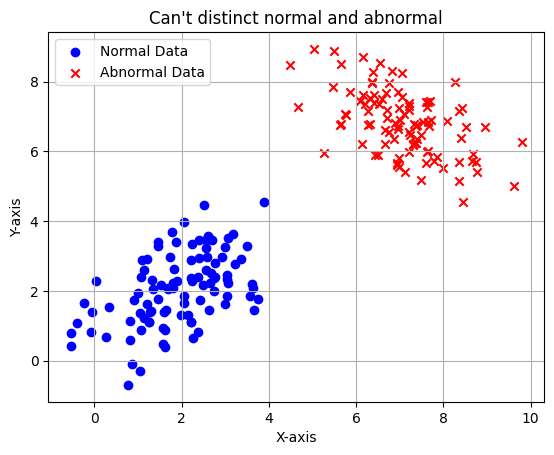

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(0)

# Generate random data for the first blob (normal data)
mean1 = [2, 2]
cov1 = [[1, 0.5], [0.5, 1]]
data1 = np.random.multivariate_normal(mean1, cov1, 100)

# Generate random data for the second blob (abnormal data)
mean2 = [7, 7]
cov2 = [[1, -0.5], [-0.5, 1]]
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# Combine the two sets of data
data = np.vstack((data1, data2))

# Create a scatter plot of the data
plt.scatter(data1[:, 0], data1[:, 1], marker='o', c='b', label='Normal Data')
plt.scatter(data2[:, 0], data2[:, 1], marker='x', c='r', label='Abnormal Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title("Can't distinct normal and abnormal")
plt.legend()

plt.grid()
plt.show()
